In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data=pd.read_csv('shipment_data.csv')

In [65]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [66]:
data.shape

(20000, 11)

In [67]:
data.columns.values

array(['Shipment ID', 'Origin', 'Destination', 'Shipment Date',
       'Planned Delivery Date', 'Actual Delivery Date', 'Vehicle Type',
       'Distance (km)', 'Weather Conditions', 'Traffic Conditions',
       'Delayed'], dtype=object)

In [68]:
data.dtypes

,0
Shipment ID,object
Origin,object
Destination,object
Shipment Date,object
Planned Delivery Date,object
Actual Delivery Date,object
Vehicle Type,object
Distance (km),int64
Weather Conditions,object
Traffic Conditions,object


In [69]:
data['Delayed'].value_counts()

,count
Delayed,
Yes,14757
No,5243


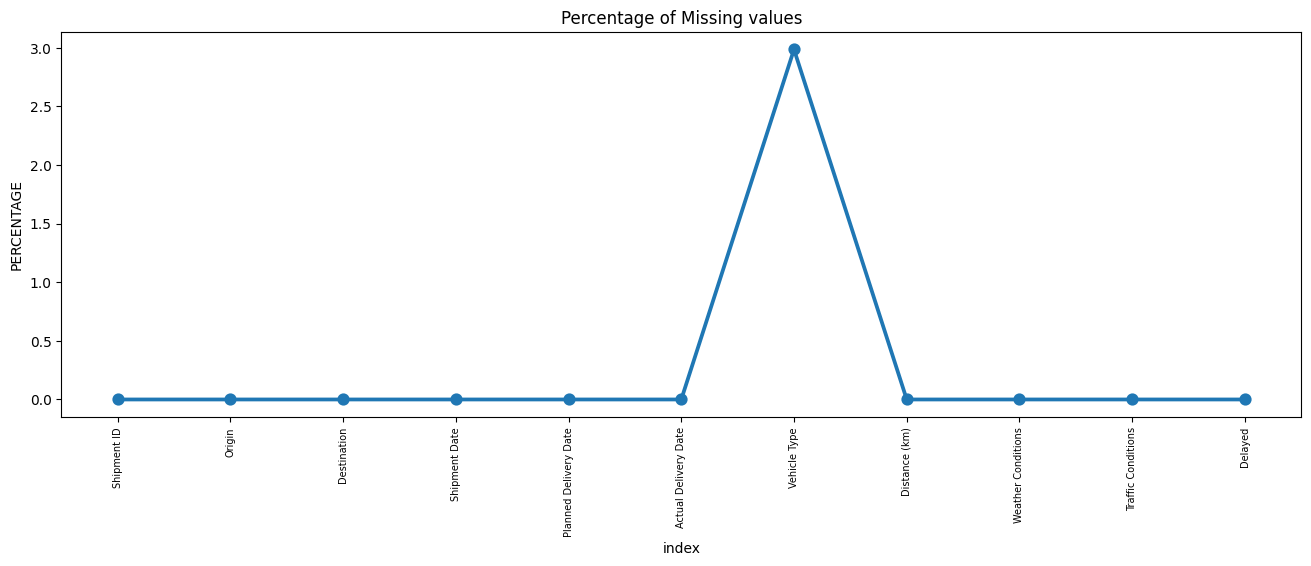

In [70]:
#handle missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [71]:
data['Vehicle Type'].fillna('NA', inplace=True)

<ipython-input-71-52afd94b5bdf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Type'].fillna('NA', inplace=True)


In [72]:
print(data['Vehicle Type'])

0          Trailer
1          Trailer
2            Truck
3        Container
4        Container
           ...    
19995        Truck
19996        Truck
19997      Trailer
19998        Lorry
19999        Lorry
Name: Vehicle Type, Length: 20000, dtype: object


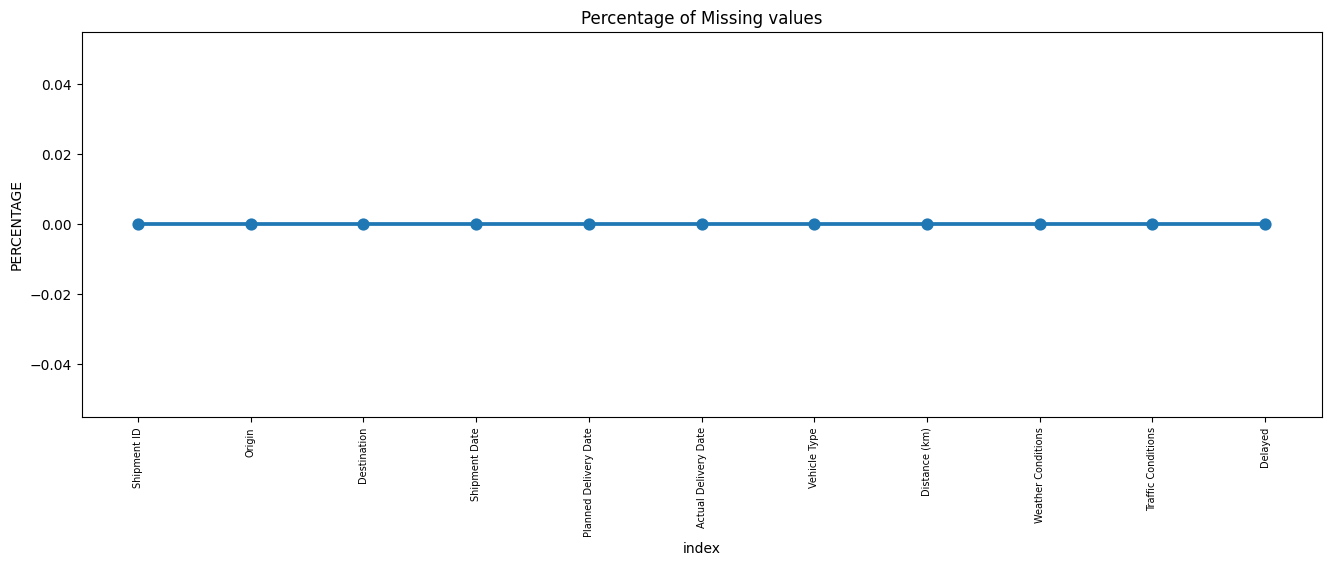

In [73]:
#handle missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

EDA

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Shipment ID            20000 non-null  object
 1   Origin                 20000 non-null  object
 2   Destination            20000 non-null  object
 3   Shipment Date          20000 non-null  object
 4   Planned Delivery Date  20000 non-null  object
 5   Actual Delivery Date   20000 non-null  object
 6   Vehicle Type           20000 non-null  object
 7   Distance (km)          20000 non-null  int64 
 8   Weather Conditions     20000 non-null  object
 9   Traffic Conditions     20000 non-null  object
 10  Delayed                20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [75]:
data.describe()

,Distance (km)
count,20000.000000
mean,1101.663750
std,520.717873
min,200.000000
25%,649.750000
50%,1102.000000
75%,1551.000000
max,2000.000000


In [76]:
#univariate analysis
data['Vehicle Type'].value_counts()

,count
Vehicle Type,
Lorry,4878
Truck,4860
Trailer,4838
Container,4827
NA,597


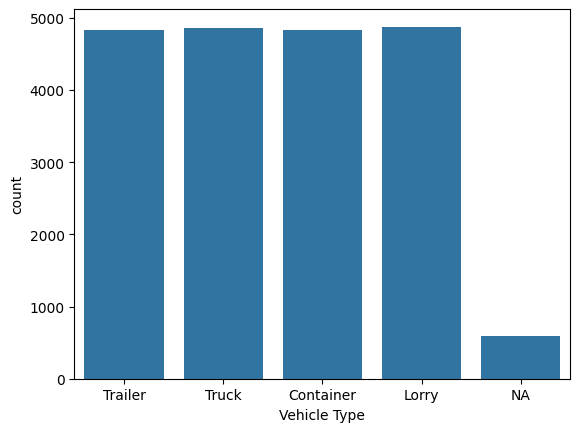

In [77]:
sns.countplot(x='Vehicle Type', data=data)
plt.show()

In [78]:
data['Weather Conditions'].value_counts()

,count
Weather Conditions,
Clear,13952
Rain,3067
Fog,2014
Storm,967


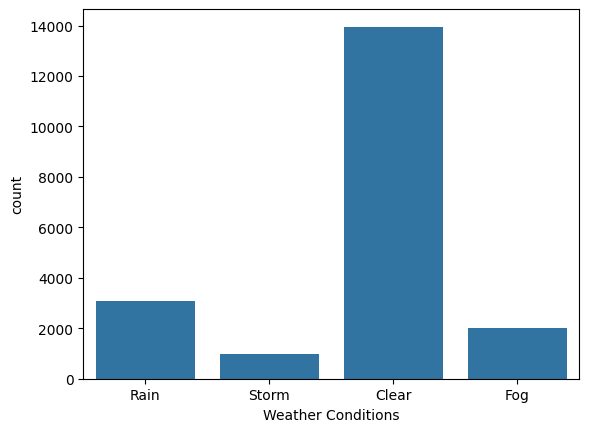

In [79]:
sns.countplot(x='Weather Conditions', data=data)
plt.show()

In [80]:
data['Traffic Conditions'].value_counts()

,count
Traffic Conditions,
Light,9950
Moderate,6978
Heavy,3072


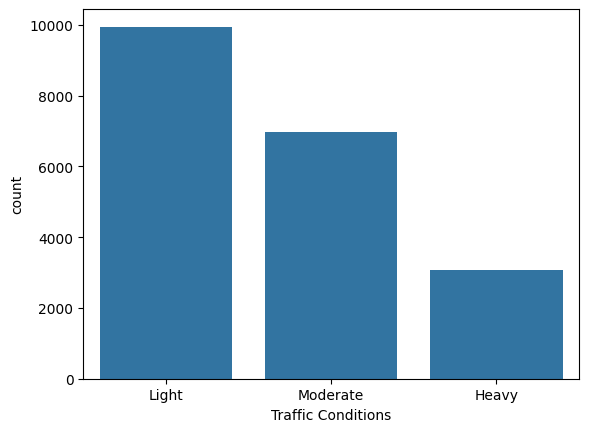

In [81]:
sns.countplot(x='Traffic Conditions', data=data)
plt.show()

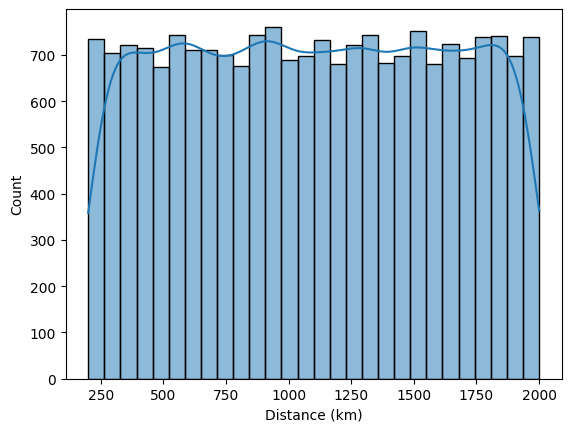

In [82]:
sns.histplot(data['Distance (km)'], kde=True)
plt.show()

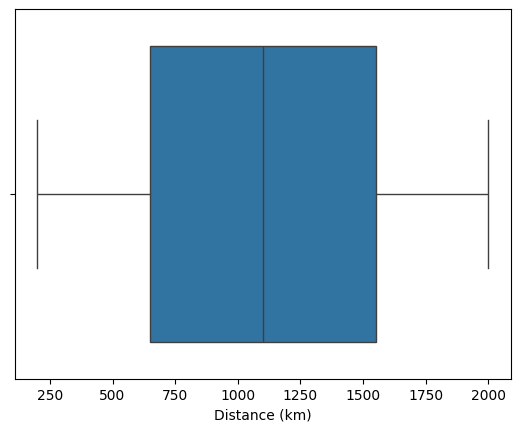

In [83]:
sns.boxplot(x=data['Distance (km)'])
plt.show()

In [84]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Vehicle Type']=le.fit_transform(data['Vehicle Type'])
data['Weather Conditions']=le.fit_transform(data['Weather Conditions'])
data['Delayed']=le.fit_transform(data['Delayed'])

In [85]:
#encoding traffic conditions
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)
traffic_reshaped = data['Traffic Conditions'].values.reshape(-1, 1)

# Fit and transform the 'Traffic Conditions' column
encoded_traffic = encoder.fit_transform(traffic_reshaped)

# Convert the encoded values into a DataFrame with appropriate column names
encoded_traffic_df = pd.DataFrame(encoded_traffic, columns=encoder.get_feature_names_out(['Traffic Conditions']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_traffic_df], axis=1)

# Optionally, drop the original 'Traffic Conditions' column if needed
data.drop('Traffic Conditions', axis=1, inplace=True)

In [86]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

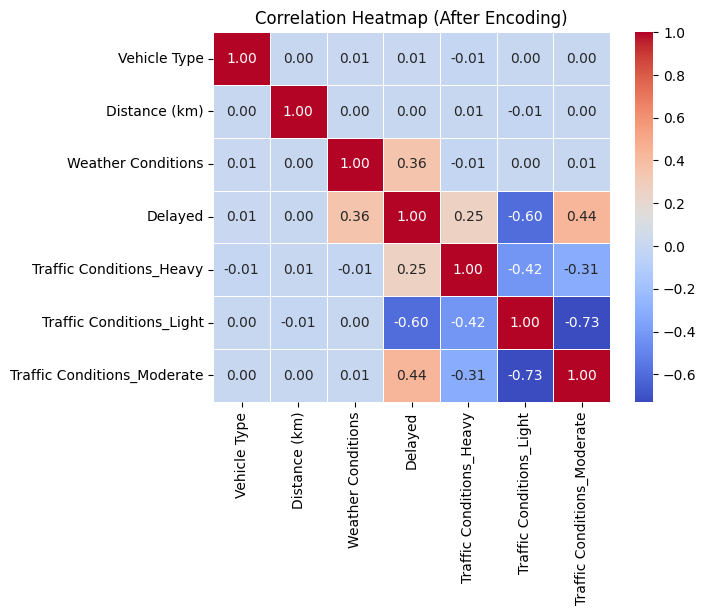

In [87]:
# Visualize the updated correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (After Encoding)')
plt.show()

From the above heat map, we can see slight positive relation between delay and weather conditions at 36%, as well as btw traffic conditions such as heavy & delay at 25%, moderate & delay at 44%

In [88]:
#finding the unique cities in both origin and destination
source_cities = set(data['Origin'].unique())
destination_cities = set(data['Destination'].unique())

In [89]:
print("Unique cities in Origin:", source_cities)
print("Unique cities in Destination:", destination_cities)

Unique cities in Origin: {'Pune', 'Kolkata', 'Chennai', 'Mumbai', 'Bangalore', 'Jaipur', 'Lucknow', 'Ahmedabad', 'Hyderabad', 'Delhi'}
Unique cities in Destination: {'Pune', 'Kolkata', 'Chennai', 'Mumbai', 'Bangalore', 'Jaipur', 'Lucknow', 'Ahmedabad', 'Hyderabad', 'Delhi'}


In [90]:
#grouping cities into regions
region_mapping = {
    'Delhi': 'North', 'Mumbai': 'West', 'Chennai': 'South', 'Kolkata': 'East',
    'Bangalore': 'South', 'Ahmedabad': 'West', 'Hyderabad': 'South',
    'Pune': 'West', 'Jaipur': 'North', 'Lucknow': 'North'
}
data['Source Region'] = data['Origin'].map(region_mapping)
data['Destination Region'] = data['Destination'].map(region_mapping)

In [91]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Delayed,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Source Region,Destination Region
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,3,1603,2,1,0.0,1.0,0.0,North,West
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,3,1237,3,1,0.0,0.0,1.0,South,North
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,4,1863,0,0,0.0,1.0,0.0,West,South
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,0,1374,0,0,0.0,1.0,0.0,South,West
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,0,676,0,1,1.0,0.0,0.0,South,East


In [92]:
# Delay count by Source Region
source_delay = data.groupby('Source Region')['Delayed'].value_counts(normalize=True).unstack() * 100
print("Delay Percentage by Source Region:\n", source_delay)

# Delay count by Destination Region
destination_delay = data.groupby('Destination Region')['Delayed'].value_counts(normalize=True).unstack() * 100
print("Delay Percentage by Destination Region:\n", destination_delay)

#1-yes
#0-no

Delay Percentage by Source Region:
 Delayed                0          1
Source Region                      
East           26.761277  73.238723
North          26.554250  73.445750
South          25.793518  74.206482
West           26.126418  73.873582
Delay Percentage by Destination Region:
 Delayed                     0          1
Destination Region                      
East                25.592173  74.407827
North               27.073010  72.926990
South               25.817156  74.182844
West                25.949473  74.050527


The delay percentages are fairly consistent across both source and destination regions.


*   From source regions, south and west have a higher percentage in delays as of 74.2% and 73.8%.
*   And in destination regions, North is the only region that has lowest delay percentage compared to other regions 72.9%.
*  South and west are the most delayed regions, both as source and destination.



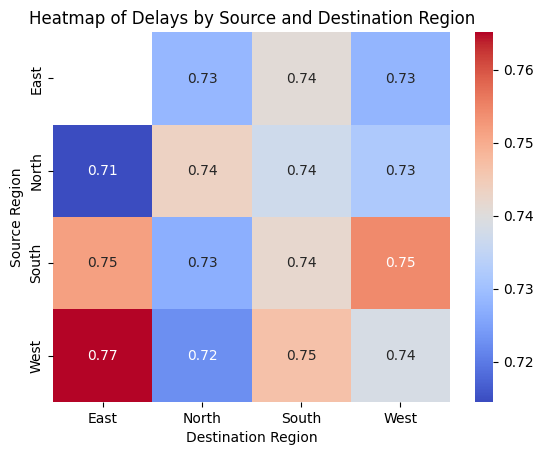

In [93]:
# Create a pivot table for heatmap
heatmap_data = data.pivot_table(index='Source Region', columns='Destination Region', values='Delayed', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Heatmap of Delays by Source and Destination Region")
plt.show()

In [94]:
#analyze traffic conditions and delay
traffic_impact = data.groupby(['Source Region', 'Delayed'])[['Traffic Conditions_Light', 'Traffic Conditions_Moderate', 'Traffic Conditions_Heavy']].mean()
print(traffic_impact)

                       Traffic Conditions_Light  Traffic Conditions_Moderate  \
Source Region Delayed                                                          
East          0                        1.000000                     0.000000   
              1                        0.318339                     0.463668   
North         0                        1.000000                     0.000000   
              1                        0.319573                     0.471939   
South         0                        1.000000                     0.000000   
              1                        0.312697                     0.473886   
West          0                        1.000000                     0.000000   
              1                        0.324704                     0.475647   

                       Traffic Conditions_Heavy  
Source Region Delayed                            
East          0                        0.000000  
              1                        0.217993  

Shipment source Cities in the West and South seem to have larger share in moderate and higher traffic conditions compared to other regions

In [95]:
traffic_impact1 = data.groupby(['Destination Region', 'Delayed'])[['Traffic Conditions_Light', 'Traffic Conditions_Moderate', 'Traffic Conditions_Heavy']].mean()
print(traffic_impact)

                       Traffic Conditions_Light  Traffic Conditions_Moderate  \
Source Region Delayed                                                          
East          0                        1.000000                     0.000000   
              1                        0.318339                     0.463668   
North         0                        1.000000                     0.000000   
              1                        0.319573                     0.471939   
South         0                        1.000000                     0.000000   
              1                        0.312697                     0.473886   
West          0                        1.000000                     0.000000   
              1                        0.324704                     0.475647   

                       Traffic Conditions_Heavy  
Source Region Delayed                            
East          0                        0.000000  
              1                        0.217993  

In [96]:
combined_impact = data.groupby(['Source Region', 'Weather Conditions', 'Delayed'])[['Traffic Conditions_Light', 'Traffic Conditions_Moderate', 'Traffic Conditions_Heavy', 'Distance (km)']].mean()
print(combined_impact)

# clear 0
# Fogg 1
# rain 2
# storm 3

                                          Traffic Conditions_Light  \
Source Region Weather Conditions Delayed                             
East          0                  0                        1.000000   
                                 1                        0.209007   
              1                  1                        0.456410   
              2                  1                        0.515254   
              3                  1                        0.426966   
North         0                  0                        1.000000   
                                 1                        0.191624   
              1                  1                        0.523654   
              2                  1                        0.488713   
              3                  1                        0.492908   
South         0                  0                        1.000000   
                                 1                        0.186767   
              1     

*   Clear weather leading to minimal delays, primarily caused by light traffic.
*   Fog and storms result in higher delays, especially in moderate traffic, while rain increases delays across all traffic conditions.
*   East and West show varying distance patterns, particularly during storms, while the North and South maintain consistent distances

In [97]:
# Strip leading/trailing whitespaces from all date columns
data['Shipment Date'] = data['Shipment Date'].str.strip()
data['Planned Delivery Date'] = data['Planned Delivery Date'].str.strip()
data['Actual Delivery Date'] = data['Actual Delivery Date'].str.strip()

In [98]:
# Convert the columns to datetime format
data['Shipment Date'] = pd.to_datetime(data['Shipment Date'], errors='coerce')
data['Planned Delivery Date'] = pd.to_datetime(data['Planned Delivery Date'], errors='coerce')
data['Actual Delivery Date'] = pd.to_datetime(data['Actual Delivery Date'], errors='coerce')

In [100]:
data['Shipment_Month'] = data['Shipment Date'].dt.month
data['Planned_Month'] = data['Planned Delivery Date'].dt.month
data['Actual_Month'] = data['Actual Delivery Date'].dt.month

In [102]:
#min shipping date
data[['Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date']].min()

,0
Shipment Date,2023-01-01
Planned Delivery Date,2023-01-02
Actual Delivery Date,2023-01-02


In [103]:
#maximum shipping date
data[['Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date']].max()

,0
Shipment Date,2024-06-01
Planned Delivery Date,2024-06-08
Actual Delivery Date,2024-06-12


In [104]:
data['Delivery Delay'] = (data['Actual Delivery Date'] - data['Planned Delivery Date']).dt.days

<Axes: xlabel='Delivery Delay', ylabel='Count'>

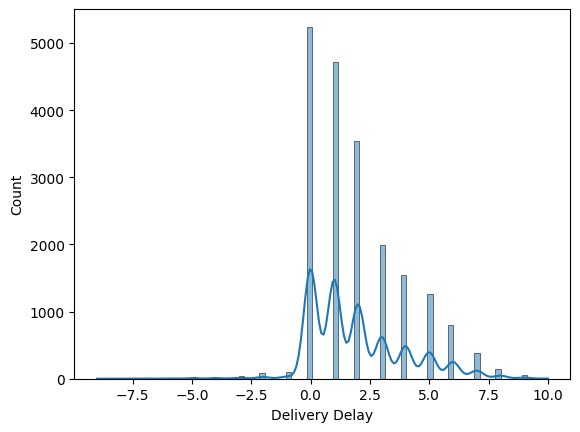

In [106]:
sns.histplot(data['Delivery Delay'], kde=True)

<Axes: xlabel='Shipment_Month', ylabel='Delivery Delay'>

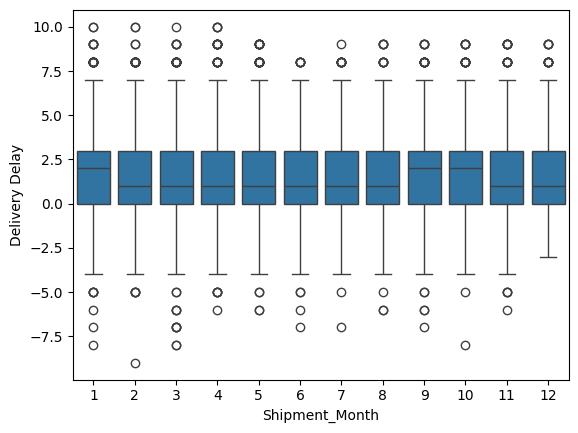

In [107]:
sns.boxplot(x='Shipment_Month', y='Delivery Delay', data=data)

January has the highest number of delays, the minimum is 0, maximum being 10 days

<Axes: xlabel='Shipment Date'>

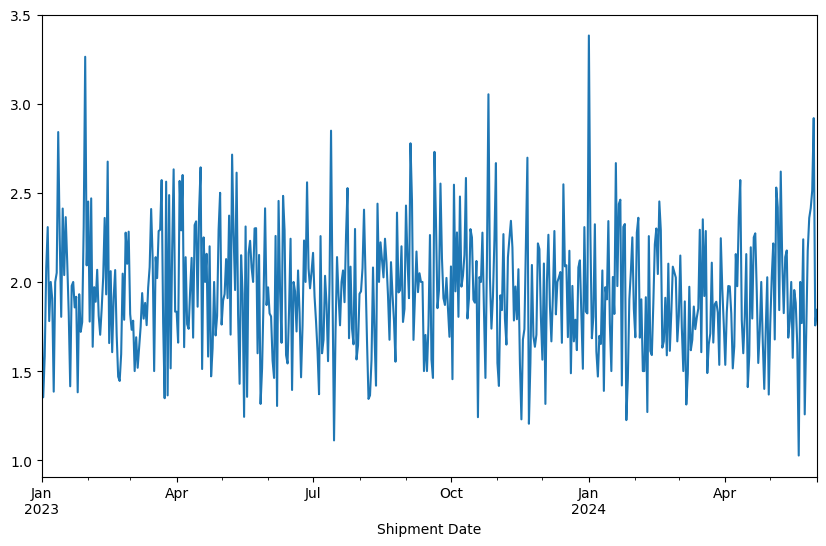

In [109]:
data.groupby('Shipment Date')['Delivery Delay'].mean().plot(figsize=(10,6))

From the above time series graph, there is consistent delays in every month but january to march have the highest number of delays in shipment

<Axes: xlabel='Weather Conditions'>

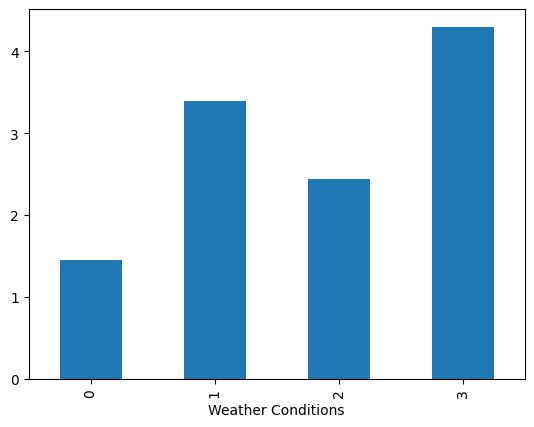

In [113]:
#delivery delay by weather conditions
data.groupby('Weather Conditions')['Delivery Delay'].mean().plot(kind='bar')

We have the highest mean delay in fog and storm weather

<Figure size 1000x20000 with 0 Axes>

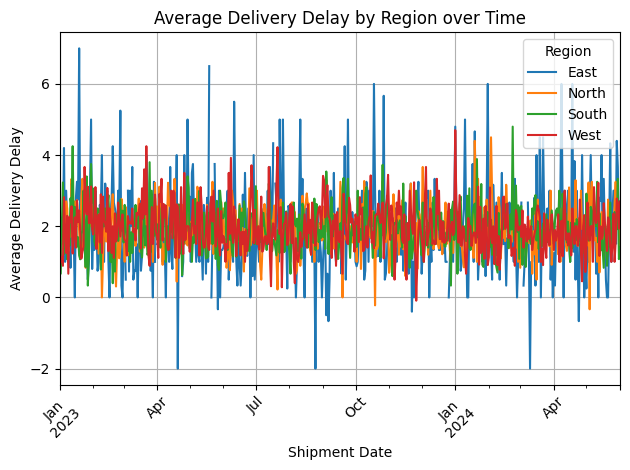

In [122]:
region_delay = data.groupby(['Shipment Date', 'Source Region'])['Delivery Delay'].mean().unstack()
plt.figure(figsize=(10,200))
region_delay.plot()
plt.title('Average Delivery Delay by Region over Time')
plt.xlabel('Shipment Date')
plt.ylabel('Average Delivery Delay')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Constant shipping delays in West and South. But there are more fluctuation in east